In [1]:
%cd ..

/home/jupyter-tim/ba-tim


In [2]:
qaplib_results = {} # Empty results cache

In [523]:
from drlqap.taskgenerators import generators
import scipy.optimize
from drlqap.simplesolver import solve_qap_backtracking, solve_qap_maxgreedy, solve_qap_faq, solve_random, solve_partial_random, solve_best_of_k, mirror_solver
from drlqap.gurobi import solve_qap_gurobi
import numpy as np
from drlqap.qap import QAP
from drlqap.qaplib import load_qap
from drlqap.evaltools import load_checkpoints
from pathlib import Path
import pandas as pd
import math
import matplotlib

In [11]:
def evaluate_set(solver, problem):
    values = []
    test_set = generators[problem].test_set()
    for qap in test_set:
        v_solver, assignment = solver(qap)
        v = qap.compute_value(assignment)
        if not np.isclose(v, v_solver):
            print (f"solver outputs incorrect value (got {v_solver}, actual {v})")
        values.append(v)
    return np.mean(values)

In [16]:
def evaluate_comparison(solvers, problem, cached_results=None):
    results = cached_results or {}
    for name, solver in solvers.items():
        if name not in results:
            print(f"Evaluating {name}...")
            values = {}
        else:
            values = results[name]
        test_set = generators[problem].test_set()
        for qap in test_set:
            if qap.name not in values:
                print(f"Evaluating {name} on {qap.name}...")
                v_solver, assignment = solver(qap)
                if not v_solver or assignment is None:
                    print(f"{name} could not solve {qap.name}")
                else:
                    v = qap.compute_value(assignment)
                    if not np.isclose(v, v_solver):
                        print (f"solver {name} outputs incorrect value on {qap.name} (got {v_solver}, actual {v})")
                    values[qap.name] = float(v)
                
        results[name] = values
    return results
    

In [179]:
solvers = {
    'faq': solve_qap_faq,
    'a2c_md': load_checkpoints(Path('runs/a2c_ms100x_mediumrandoms/lr4e-5_s3'))[-1].solve,
    'random': solve_random,
    'max_greedy': solve_qap_maxgreedy,
    'dqn_sm': load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1'))[-1].solve,
    'dqn_md': load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1'))[-1].solve,
    'rf': load_checkpoints(Path('runs/reinforce_ms100x_smallrandoms/lr1e-4_s4/'))[-1].solve,
    'last7opt': lambda qap: solve_partial_random(qap, 7),
    'last8opt': lambda qap: solve_partial_random(qap, 8),
    'rand1k': lambda qap: solve_best_of_k(qap, 1000, solve_random),
    'rand5k': lambda qap: solve_best_of_k(qap, 5000, solve_random),
    'rand10k': lambda qap: solve_best_of_k(qap, 10000, solve_random),
    'a2c_sm': load_checkpoints(Path('runs/a2c_ms100x_smallrandoms/lr4e-5_s2'))[-1].solve,
    'mcq_sm': load_checkpoints(Path('runs/mcq_eps0_smallrandoms/lr3e-4_s2'))[-1].solve,
    'dqn_md_e': load_checkpoints(Path('runs/dqn_dense_ms_ec_mediumrandoms/lr5e-4_s1'))[-1].solve,
    'a2c_long': load_checkpoints(Path('runs/a2c_ms100x_mediumrandoms/lr2e-5_s1'))[-1].solve,
    'dqn_mini': load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_mini/lr5e-4_s2/'))[-1].solve,
}


solvers['rf_m'] = mirror_solver(solvers['rf'])
solvers['a2c_m'] = mirror_solver(solvers['a2c_sm'])
solvers['mcq_m'] = mirror_solver(solvers['mcq_sm'])
solvers['dqn_m'] = mirror_solver(solvers['rf'])

runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_0.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_1000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_2000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_3000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_4000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_5000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_6000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_7000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_8000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_9000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_10000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_11000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_12000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_13000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_14000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_s3/checkpoint_15000.pth
runs/a2c_ms100x_mediumrandoms/lr4e-5_

runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_6000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_7000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_8000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_9000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_10000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_11000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_12000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_13000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_14000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_15000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_16000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_17000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_18000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_19000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_20000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_21000.pth
runs/mcq_eps0_smallrandoms/lr3e-4_s2/checkpoint_22000.pth
runs/mcq_eps0_smal

In [180]:
qaplib_results = evaluate_comparison(solvers, 'qaplib_all_150_normalized', cached_results=qaplib_results)

Evaluating dqn_m...
Evaluating dqn_m on bur26a...
Evaluating dqn_m on bur26b...
Evaluating dqn_m on bur26c...
Evaluating dqn_m on bur26d...
Evaluating dqn_m on bur26e...
Evaluating dqn_m on bur26f...
Evaluating dqn_m on bur26g...
Evaluating dqn_m on bur26h...
Evaluating dqn_m on chr12a...
Evaluating dqn_m on chr12b...
Evaluating dqn_m on chr12c...
Evaluating dqn_m on chr15a...
Evaluating dqn_m on chr15b...
Evaluating dqn_m on chr15c...
Evaluating dqn_m on chr18a...
Evaluating dqn_m on chr18b...
Evaluating dqn_m on chr20a...
Evaluating dqn_m on chr20b...
Evaluating dqn_m on chr20c...
Evaluating dqn_m on chr22a...
Evaluating dqn_m on chr22b...
Evaluating dqn_m on chr25a...
Evaluating dqn_m on els19...
Evaluating dqn_m on esc128...
Evaluating dqn_m on esc16a...
Evaluating dqn_m on esc16b...
Evaluating dqn_m on esc16c...
Evaluating dqn_m on esc16d...
Evaluating dqn_m on esc16e...
Evaluating dqn_m on esc16g...
Evaluating dqn_m on esc16h...
Evaluating dqn_m on esc16i...
Evaluating dqn_m on e

In [1044]:
ngm_g5k_results = {
"bur26a": 5621774, 
"bur26b": 3927943, 
"bur26c": 5608065, 
"bur26d": 3962317, 
"bur26e": 5536142, 
"bur26f": 3949711, 
"bur26g": 10433439, 
"bur26h": 7348866, 
"chr12a": 14940, 
"chr12b": 14984, 
"chr12c": 16346, 
"chr15a": 20442, 
"chr15b": 22048, 
"chr15c": 24190, 
"chr18a": 33124, 
"chr18b": 2504, 
"chr20a": 5178, 
"chr20b": 5766, 
"chr20c": 49770, 
"chr22a": 9348, 
"chr22b": 9006, 
"chr25a": 11648, 
"els19": 27029748, 
"esc16a": 78, 
"esc16b": 292, 
"esc16c": 174, 
"esc16d": 20, 
"esc16e": 32, 
#"esc16f": 0, 
"esc16g": 32, 
"esc16h": 1004, 
"esc16i": 18, 
"esc16j": 8, 
"esc32a": 298, 
"esc32b": 368, 
"esc32c": 754, 
"esc32d": 284, 
"esc32e": 2, 
"esc32g": 10, 
"esc32h": 534, 
"esc64a": 200, 
"esc128": 242, 
"had12": 1700, 
"had14": 2866, 
"had16": 3902, 
"had18": 5558, 
"had20": 7300, 
"kra30a": 114410, 
"kra30b": 118130, 
"kra32": 120930, 
"lipa20a": 3853, 
"lipa20b": 33125, 
"lipa30a": 13631, 
"lipa30b": 187607, 
"lipa40a": 32454, 
"lipa40b": 601848, 
"lipa50a": 63671, 
"lipa50b": 1523856, 
"lipa60a": 109595, 
"lipa60b": 3208501, 
"lipa70a": 173220, 
"lipa70b": 5890161, 
"lipa80a": 257663, 
"lipa80b": 9983040, 
"lipa90a": 366508, 
"lipa90b": 16076956, 
"nug12": 634, 
"nug14": 1156, 
"nug15": 1318, 
"nug16a": 1836, 
"nug16b": 1396, 
"nug17": 1980, 
"nug18": 2242, 
"nug20": 2936, 
"nug21": 2916, 
"nug22": 4298, 
"nug24": 4234, 
"nug25": 4420, 
"nug27": 6208, 
"nug28": 6128, 
"nug30": 7294, 
"rou12": 264898, 
"rou15": 403872, 
"rou20": 817776, 
"scr12": 36292, 
"scr15": 68768, 
"scr20": 154636, 
"sko42": 18716, 
"sko49": 27554, 
"sko56": 40684, 
"sko64": 56222, 
"sko72": 76870, 
"sko81": 104710, 
"sko90": 132942, 
"sko100a": 172810, 
"sko100b": 175588, 
"sko100c": 169806, 
"sko100d": 170816, 
"sko100e": 170958, 
"sko100f": 169986, 
"ste36a": 16768, 
"ste36b": 43248, 
"ste36c": 12988352, 
"tai12a": 255158, 
"tai12b": 47252044, 
"tai15a": 436968, 
"tai15b": 52871608, 
"tai17a": 544754, 
"tai20a": 806382, 
"tai20b": 140704160, 
"tai25a": 1352912, 
"tai25b": 518647040, 
"tai30a": 2065706, 
"tai30b": 896379008, 
"tai35a": 2786748, 
"tai35b": 377687744, 
"tai40a": 3610604, 
"tai40b": 917498816, 
"tai50a": 5677282, 
"tai50b": 614638528, 
"tai60a": 8281996, 
"tai60b": 862969152, 
"tai64c": 2133738, 
"tai80a": 15283138, 
"tai80b": 1120577408, 
"tai100a": 23644528, 
"tai100b": 1612020992, 
"tai150b": 628349568, 
"tho30": 185622, 
"tho40": 304878, 
"tho150": 9557766, 
"wil50": 53418, 
"wil100": 294172,
}

qaplib_results["ngm_g5k"] = ngm_g5k_results

In [1043]:
ngm_results = {
"bur26a": 5684628,
"bur26b": 4063246,
"bur26c": 5638641,
"bur26d": 3994147,
"bur26e": 5666202,
"bur26f": 3954977,
"bur26g": 10855165,
"bur26h": 7670546,
"chr12a": 27556,
"chr12b": 29396,
"chr12c": 34344,
"chr15a": 50272,
"chr15b": 52082,
"chr15c": 38568,
"chr18a": 83026,
"chr18b": 4810,
"chr20a": 10728,
"chr20b": 9962,
"chr20c": 115128,
"chr22a": 16410,
"chr22b": 15876,
"chr25a": 18950,
"els19": 34880280,
"esc16a": 88,
"esc16b": 308,
"esc16c": 184,
"esc16d": 40,
"esc16e": 48,
#"esc16f": 0,
"esc16g": 50,
"esc16h": 1036,
"esc16i": 26,
"esc16j": 16,
"esc32a": 428,
"esc32b": 424,
"esc32c": 844,
"esc32d": 288,
"esc32e": 42,
"esc32g": 28,
"esc32h": 592,
"esc64a": 250,
"esc128": 238,
"had12": 1790,
"had14": 2922,
"had16": 4150,
"had18": 5780,
"had20": 7334,
"kra30a": 114410,
"kra30b": 118130,
"kra32": 121340,
"lipa20a": 3929,
"lipa20b": 33907,
"lipa30a": 13841,
"lipa30b": 192356,
"lipa40a": 32666,
"lipa40b": 616656,
"lipa50a": 64100,
"lipa50b": 1543264,
"lipa60a": 110094,
"lipa60b": 3269504,
"lipa70a": 173862,
"lipa70b": 5978316,
"lipa80a": 258402,
"lipa80b": 10173155,
"lipa90a": 367193,
"lipa90b": 16194745,
"nug12": 720,
"nug14": 1210,
"nug15": 1482,
"nug16a": 1836,
"nug16b": 1580,
"nug17": 2004,
"nug18": 2312,
"nug20": 2936,
"nug21": 2916,
"nug22": 4616,
"nug24": 4234,
"nug25": 4420,
"nug27": 6332,
"nug28": 6128,
"nug30": 7608,
"rou12": 321082,
"rou15": 469592,
"rou20": 897348,
"scr12": 44400,
"scr15": 81344,
"scr20": 182882,
"sko42": 20192,
"sko49": 28712,
"sko56": 42182,
"sko64": 60368,
"sko72": 79716,
"sko81": 107588,
"sko90": 137402,
"sko100a": 180972,
"sko100b": 180774,
"sko100c": 175740,
"sko100d": 175096,
"sko100e": 176010,
"sko100f": 173552,
"ste36a": 16648,
"ste36b": 43248,
"ste36c": 12988352,
"tai12a": 259014,
"tai12b": 65138752,
"tai15a": 467812,
"tai15b": 495479040,
"tai17a": 630644,
"tai20a": 896518,
"tai20b": 237607744,
"tai25a": 1393248,
"tai25b": 730775168,
"tai30a": 2065706,
"tai30b": 1359600384,
"tai35a": 2886132,
"tai35b": 455718176,
"tai40a": 3610604,
"tai40b": 1053339520,
"tai50a": 5891066,
"tai50b": 764856128,
"tai60a": 8596094,
"tai60b": 994559424,
"tai64c": 5703540,
"tai80a": 15648708,
"tai80b": 1275809408,
"tai100a": 24077728,
"tai100b": 1853681152,
"tai150b": 653429440,
"tho30": 187062,
"tho40": 313026,
"tho150": 9702946,
"wil50": 55390,
"wil100": 295418,
}

qaplib_results["ngm"] = ngm_results

In [182]:
def combine_results(name_a, name_b):
    return {
        q: min(qaplib_results[name_a][q], qaplib_results[name_b][q])
        for q in qaplib_results[name_a] if q in qaplib_results[name_b]
    }

In [183]:
qaplib_results["a2c_cm"] = combine_results('a2c_sm', 'a2c_m')
qaplib_results["rf_cm"] = combine_results('rf', 'rf_m')
qaplib_results["mcq_cm"] = combine_results('mcq_sm', 'mcq_m')
qaplib_results["dqn_cm"] = combine_results('dqn_sm', 'dqn_m')

In [184]:
# Qaplib solutions
qaplib_results["known"] = {}
for qap in generators["qaplib_all_150_normalized"].test_set():
    if qap.known_solution:
        qaplib_results["known"][qap.name] = qap.known_solution.value

In [185]:
from collections import defaultdict

def results_by_qap(results_by_solver):
    out = defaultdict(dict)
    for solver, results in results_by_solver.items():
        for qap, value in results.items():
            out[qap][solver] = value
    return dict(out)

In [186]:
benchmark = 'known'
compare = ['ngm_g5k', 'a2c_sm', 'a2c_m']
count_by_solver = defaultdict(lambda: 0)
for qap, results in results_by_qap(qaplib_results).items():
    # Skip qaps where one of the solvers has no result
    incomplete_results = False
    for solver in compare + [benchmark]:
        if solver not in results:
            print(solver, "has no data on", qap)
            incomplete_results = True
    if incomplete_results:
        print("Skipping", qap)
        continue

    ordered_results = sorted([s for s in results if s in compare], key=lambda s: results[s])
    base = results[benchmark]
    gap_to_benchmark = [f"{solver:>8}: {(results[solver]/base-1)*100:>5.1f}" for solver in ordered_results]
    print(f'{f"[{qap}]":>11} {base:>10} | {", ".join(gap_to_benchmark)}')
    count_by_solver[ordered_results[0]] += 1

print("\nNumber of times best value achieved")
for solver, count in count_by_solver.items():
    print(solver, count)

   [bur26a]    5426670 |    a2c_m:   2.6,  ngm_g5k:   3.6,   a2c_sm:   3.8
   [bur26b]    3817852 |  ngm_g5k:   2.9,    a2c_m:   3.6,   a2c_sm:   5.3
   [bur26c]    5426795 |    a2c_m:   2.8,   a2c_sm:   3.3,  ngm_g5k:   3.3
   [bur26d]    3821225 |  ngm_g5k:   3.7,    a2c_m:   4.5,   a2c_sm:   6.7
   [bur26e]    5386879 |  ngm_g5k:   2.8,   a2c_sm:   4.6,    a2c_m:   5.5
   [bur26f]    3782044 |    a2c_m:   3.8,  ngm_g5k:   4.4,   a2c_sm:   6.7
   [bur26g]   10117172 |  ngm_g5k:   3.1,    a2c_m:   3.3,   a2c_sm:   4.7
   [bur26h]    7098658 |  ngm_g5k:   3.5,    a2c_m:   4.9,   a2c_sm:   5.3
   [chr12a]       9552 |  ngm_g5k:  56.4,   a2c_sm:  57.6,    a2c_m: 219.7
   [chr12b]       9742 |  ngm_g5k:  53.8,   a2c_sm:  76.0,    a2c_m: 215.5
   [chr12c]      11156 |   a2c_sm:  15.0,  ngm_g5k:  46.5,    a2c_m:  97.6
   [chr15a]       9896 |  ngm_g5k: 106.6,   a2c_sm: 138.4,    a2c_m: 351.9
   [chr15b]       7990 |   a2c_sm:  68.0,  ngm_g5k: 175.9,    a2c_m: 304.6
   [chr15c]       9504 | 

# Gaps by class

In [187]:
for qap in generators["qaplib_all_150_normalized"].test_set():
    if not qap.known_solution: print(qap.name)

tai10a
tai10b


In [354]:
rgm_results_by_class = {
    'bur': 0.071,
    'chr': 1.124,
    'esc': 0.328,
    'had': 0.062,
    'kra': 0.150,
    'lipa': 0.133,
    'nug': 0.097,
    'rou': 0.134,
    'scr': 0.455,
    'sko': 0.106,
    'ste': 1.341,
    'tai': 0.173,
    'tho': 0.207,
    'wil': 0.081,
}

In [355]:
import re
def get_qaplib_class(name):
    return re.match("[a-z]*", name).group()

qap_classes = defaultdict(list)
for qap in generators["qaplib_all_150_normalized"].test_set():
    qap_classes[get_qaplib_class(qap.name)].append(qap)
del qap_classes["els"]
qap_classes = dict(qap_classes)

In [1014]:
def gaps_by_class(solvers, reference="known", qap_size=64):
    class_gaps = defaultdict(dict)
    problems_by_class = dict()
    if 'rgm' in solvers: # Hack to get RGM class values
        class_gaps['rgm'] = rgm_results_by_class
        solvers = [s for s in solvers if s != 'rgm']
    for category, qaps in qap_classes.items():
        # Skip qaps where one of the solvers has no result
        filtered_qaps = []
        for q in qaps:
            incomplete_results = False
            for solver in compare + [benchmark]:
                if q.name not in qaplib_results[solver]:
                    incomplete_results = True
            if not incomplete_results:
                filtered_qaps.append(q)
            else:
                print("Skipping", q.name, "(some solvers have no value)")
        qaps = filtered_qaps
        problems_by_class[category] = qaps
        
        for solver in solvers:
            gaps = []
            for qap in qaps:
                if qap.size < qap_size:
                    if qap.name in qaplib_results[reference]:
                        base_val = qaplib_results[reference][qap.name]
                        gaps.append(qaplib_results[solver][qap.name] / base_val - 1)
            class_gaps[solver][category] = np.mean(gaps)
    return dict(class_gaps), problems_by_class
        
def pretty_print_class_gaps(class_gaps, class_qaps):
    solvers = class_gaps.keys()
    for category in class_qaps:
        ordered = sorted(solvers, key=lambda s: class_gaps[s][category])
        gaps_strings = [f"{s:>8}: {class_gaps[s][category]*100:>5.1f}" for s in ordered]
        min_size = min([q.size for q in class_qaps[category]])
        max_size = max([q.size for q in class_qaps[category]])
        print(f'{f"[{category}, {min_size}-{max_size}]":<13}{",".join(gaps_strings)}')
        
    for solver in solvers:
        print(f"{solver} mean: {np.mean(list(class_gaps[solver].values()))*100:.2f}")
                        
def class_gaps_df(class_gaps, class_qaps):
    category_labels = [
        f"{category} \\tiny{{{min(q.size for q in qaps)}-{max(q.size for q in qaps)}}}"
        for category, qaps in class_qaps.items()
    ]
    df = pd.DataFrame({solver: list(class_gaps[solver].values()) for solver in class_gaps}, index=category_labels)
    df.loc['mean'] = df.mean()
    return df*100

In [1015]:
pretty_print_class_gaps(*gaps_by_class(["rf", "a2c_sm", "mcq_sm", "dqn_sm", 'ngm_g5k', 'faq'], qap_size=150))

Skipping tai10a (some solvers have no value)
Skipping tai10b (some solvers have no value)
[bur, 26-26]      faq:   0.2,  mcq_sm:   3.0, ngm_g5k:   3.4,      rf:   4.0,  a2c_sm:   5.0,  dqn_sm:  21.6
[chr, 12-25]      faq:  54.9,  a2c_sm:  74.5,  dqn_sm:  96.7, ngm_g5k: 121.3,  mcq_sm: 254.2,      rf: 276.6
[esc, 16-128]  a2c_sm:  18.0,  dqn_sm:  28.9,     faq:  29.2, ngm_g5k:  47.9,  mcq_sm: 153.8,      rf: 250.3
[had, 12-20]      faq:   0.8,      rf:   4.0,  a2c_sm:   4.1, ngm_g5k:   4.4,  mcq_sm:  10.9,  dqn_sm:  12.2
[kra, 30-32]      faq:   5.7,  a2c_sm:  25.7,      rf:  27.0,  mcq_sm:  27.4, ngm_g5k:  31.4,  dqn_sm:  35.5
[lipa, 20-90]     faq:   1.9,  a2c_sm:  13.2,      rf:  14.0, ngm_g5k:  14.5,  mcq_sm:  15.3,  dqn_sm:  17.1
[nug, 12-30]      faq:   3.0,      rf:  14.0,  a2c_sm:  15.8, ngm_g5k:  16.3,  mcq_sm:  21.7,  dqn_sm:  30.8
[rou, 12-20]      faq:   3.8, ngm_g5k:  13.1,  a2c_sm:  17.0,  mcq_sm:  18.7,  dqn_sm:  19.3,      rf:  20.2
[scr, 12-20]   a2c_sm:  16.9,     faq:

In [1016]:
pretty_print_class_gaps(*gaps_by_class(['faq', 'ngm_g5k', "mcq_cm", "dqn_cm", "rf_cm", "a2c_cm"], qap_size=150))

Skipping tai10a (some solvers have no value)
Skipping tai10b (some solvers have no value)
[bur, 26-26]      faq:   0.2,  mcq_cm:   3.0, ngm_g5k:   3.4,  a2c_cm:   3.8,   rf_cm:   4.0,  dqn_cm:  14.4
[chr, 12-25]      faq:  54.9,  dqn_cm:  70.4,  a2c_cm:  74.5,   rf_cm:  87.9, ngm_g5k: 121.3,  mcq_cm: 125.3
[esc, 16-128]  dqn_cm:  14.2,  a2c_cm:  16.1,   rf_cm:  21.6,  mcq_cm:  21.9,     faq:  29.2, ngm_g5k:  47.9
[had, 12-20]      faq:   0.8,  a2c_cm:   2.9,   rf_cm:   4.0, ngm_g5k:   4.4,  mcq_cm:   8.0,  dqn_cm:   9.4
[kra, 30-32]      faq:   5.7,  mcq_cm:  20.5,   rf_cm:  21.7,  a2c_cm:  22.0,  dqn_cm:  28.9, ngm_g5k:  31.4
[lipa, 20-90]     faq:   1.9,  a2c_cm:  12.9,   rf_cm:  13.8,  dqn_cm:  14.3, ngm_g5k:  14.5,  mcq_cm:  14.6
[nug, 12-30]      faq:   3.0,  a2c_cm:  12.2,   rf_cm:  12.3, ngm_g5k:  16.3,  mcq_cm:  18.9,  dqn_cm:  20.6
[rou, 12-20]      faq:   3.8, ngm_g5k:  13.1,  dqn_cm:  14.0,  a2c_cm:  14.2,   rf_cm:  14.3,  mcq_cm:  18.7
[scr, 12-20]   a2c_cm:  16.9,     faq:

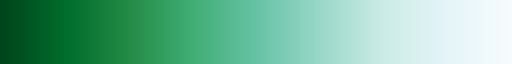

In [1017]:
blues_cmap = matplotlib.cm.get_cmap("BuGn_r")
blues_cmap

In [1067]:
def highlight_df(df, highlight_ignore=None, gradient=False, bold_ignore=None):
    #for i in df.index:
    #    row = df.loc[i]
    #    formatted = row.apply(lambda x: f"{x * 100:.1f}")
    #    bold = formatted.apply(lambda s: f"\\mathbf{{{s}}}")
    #    df.loc[i] = bold.where(row == row.min(), formatted)
    if bold_ignore:
        bold_columns = [c for c in df.columns if c not in bold_ignore]
    else:
        bold_columns = df.columns
    s = df.style.highlight_min(subset=bold_columns, axis=1, props="font-weight: bold")
    if gradient:
        subset=[c for c in df.index if c != "mean"]
        s = s.background_gradient(subset=(subset,df.columns), axis=1, cmap="BuGn_r", low=1.3)
    if highlight_ignore is not None:
        subset=[c for c in df.columns if c not in highlight_ignore]
        s = s.highlight_min(subset=subset, axis=1, props="text-decoration: underline; underline:--rwrap --latex")
    return s

def insert_line(string, line, index):
    lines = string.splitlines()
    lines.insert(index, line)
    return "\n".join(lines)

def insert_midrule(latex, index):
    return insert_line(latex, '\\midrule', index)

def save_str(path, string):
    with open(path, "w") as f:
        f.write(string)

In [1019]:
table_path = Path("paper/tables")

In [1068]:
df = class_gaps_df(*gaps_by_class(["faq", "mcq_cm", "dqn_cm", "rf_cm", "a2c_cm", 'ngm_g5k', "rand10k"], qap_size=64))
labels = {
    "faq": "FAQ",
    "mcq_cm": "MCQ", 
    "dqn_cm": "DQN", 
    "rf_cm": "RF",
    "a2c_cm": "A2C",
    "ngm_g5k": "NGM",
    "rand10k": "10k rand"
}
df.columns = [labels[c] for c in df.columns]
s = highlight_df(df, highlight_ignore="FAQ", gradient=True).format(precision=1)

# Spacing of initial column is important to preserve line breaks (could not get other methods to work with proper spacing)
column_format = ">{\\centering\\arraybackslash}m{0.8cm}*{"+str(len(df.columns))+"}{c}"
latex = s.to_latex(convert_css=True, column_format=column_format, hrules=True)
latex = insert_line(latex, '\\midrule', -3)
save_str(table_path / "cm_classes_heatmap.tex", latex)
print(latex)
s

Skipping tai10a (some solvers have no value)
Skipping tai10b (some solvers have no value)
\begin{tabular}{>{\centering\arraybackslash}m{0.8cm}*{7}{c}}
\toprule
 & FAQ & MCQ & DQN & RF & A2C & NGM & 10k rand \\
\midrule
bur \tiny{26-26} & \bfseries {\cellcolor[HTML]{80CDB7}} \color[HTML]{000000} 0.2 & {\cellcolor[HTML]{A4DCCF}} \color[HTML]{000000} \underline{3.0} & {\cellcolor[HTML]{F7FCFD}} \color[HTML]{000000} 14.4 & {\cellcolor[HTML]{B0E1D6}} \color[HTML]{000000} 4.0 & {\cellcolor[HTML]{ADE0D4}} \color[HTML]{000000} 3.8 & {\cellcolor[HTML]{AADFD3}} \color[HTML]{000000} 3.4 & {\cellcolor[HTML]{A5DDD0}} \color[HTML]{000000} 3.1 \\
chr \tiny{12-25} & \bfseries {\cellcolor[HTML]{80CDB7}} \color[HTML]{000000} 54.9 & {\cellcolor[HTML]{F3FAFC}} \color[HTML]{000000} 125.3 & {\cellcolor[HTML]{A5DDD0}} \color[HTML]{000000} \underline{70.4} & {\cellcolor[HTML]{CDECE7}} \color[HTML]{000000} 87.9 & {\cellcolor[HTML]{AFE1D5}} \color[HTML]{000000} 74.5 & {\cellcolor[HTML]{F0F9FB}} \color[HTML]{000

,FAQ,MCQ,DQN,RF,A2C,NGM,10k rand
bur \tiny{26-26},0.2,3.0,14.4,4.0,3.8,3.4,3.1
chr \tiny{12-25},54.9,125.3,70.4,87.9,74.5,121.3,130.5
esc \tiny{16-128},32.0,22.1,12.6,19.8,17.8,32.0,28.8
had \tiny{12-20},0.8,8.0,9.4,4.0,2.9,4.4,4.5
kra \tiny{30-32},5.7,20.5,28.9,21.7,22.0,31.4,31.4
lipa \tiny{20-90},2.5,14.4,14.2,13.4,12.0,14.1,14.1
nug \tiny{12-30},3.0,18.9,20.6,12.3,12.2,16.3,15.4
rou \tiny{12-20},3.8,18.7,14.0,14.3,14.2,13.1,11.2
scr \tiny{12-20},17.4,36.9,21.1,28.1,16.9,30.2,30.2
sko \tiny{42-100},1.3,15.2,21.5,14.0,11.8,18.1,17.3


In [1034]:
df = class_gaps_df(*gaps_by_class(["faq", "mcq_cm", "dqn_cm", "rf_cm", "a2c_cm", 'ngm_g5k', "last8opt"], qap_size=64))
highlight_df(df, gradient=True)

Skipping tai10a (some solvers have no value)
Skipping tai10b (some solvers have no value)


,faq,mcq_cm,dqn_cm,rf_cm,a2c_cm,ngm_g5k,last8opt
bur \tiny{26-26},0.203369,2.970819,14.354639,3.979700,3.775032,3.420791,6.998868
chr \tiny{12-25},54.889579,125.326586,70.353999,87.860875,74.527279,121.331670,205.623665
esc \tiny{16-128},31.973912,22.115333,12.625890,19.829645,17.785200,31.968844,221.907636
had \tiny{12-20},0.774443,8.016378,9.405080,4.034722,2.878799,4.440910,8.625613
kra \tiny{30-32},5.720320,20.499196,28.919425,21.665470,21.999695,31.415976,40.979895
lipa \tiny{20-90},2.465710,14.438082,14.193712,13.384024,11.975426,14.146273,15.291863
nug \tiny{12-30},2.999184,18.933657,20.603911,12.258907,12.172824,16.303466,23.517995
rou \tiny{12-20},3.831076,18.749506,14.039456,14.305023,14.187253,13.068629,11.812209
scr \tiny{12-20},17.403278,36.947137,21.111427,28.147512,16.927683,30.184252,70.203900
sko \tiny{42-100},1.349380,15.160313,21.507813,13.953719,11.787853,18.085600,21.044108


In [1031]:
df = class_gaps_df(*gaps_by_class(["faq", "mcq_sm", "dqn_sm", "rf", "a2c_sm", 'ngm_g5k', "rand10k"], qap_size=64))
labels = {
    "faq": "FAQ",
    "mcq_sm": "MCQ", 
    "dqn_sm": "DQN", 
    "rf": "RF",
    "a2c_sm": "A2C",
    "ngm_g5k": "NGM",
    "rand10k": "10k rand"
}
df.columns = [labels[c] for c in df.columns]
s = highlight_df(df, highlight_ignore="FAQ", gradient=True).format(precision=1)

# Spacing of initial column is important to preserve line breaks (could not get other methods to work with proper spacing)
column_format = ">{\\centering\\arraybackslash}m{0.8cm}*{"+str(len(df.columns))+"}{c}"
latex = s.to_latex(convert_css=True, column_format=column_format, hrules=True)
latex = insert_line(latex, '\\midrule', -3)
save_str(table_path / "sm_classes_heatmap.tex", latex)
print(latex)
s

Skipping tai10a (some solvers have no value)
Skipping tai10b (some solvers have no value)
\begin{tabular}{>{\centering\arraybackslash}m{0.8cm}*{7}{c}}
\toprule
 & FAQ & MCQ & DQN & RF & A2C & NGM & 10k rand \\
\midrule
bur \tiny{26-26} & \bfseries {\cellcolor[HTML]{80CDB7}} \color[HTML]{000000} 0.2 & {\cellcolor[HTML]{98D8C9}} \color[HTML]{000000} \underline{3.0} & {\cellcolor[HTML]{F7FCFD}} \color[HTML]{000000} 21.6 & {\cellcolor[HTML]{A0DBCD}} \color[HTML]{000000} 4.0 & {\cellcolor[HTML]{A8DED2}} \color[HTML]{000000} 5.0 & {\cellcolor[HTML]{9CD9CA}} \color[HTML]{000000} 3.4 & {\cellcolor[HTML]{98D8C9}} \color[HTML]{000000} 3.1 \\
chr \tiny{12-25} & \bfseries {\cellcolor[HTML]{80CDB7}} \color[HTML]{000000} 54.9 & {\cellcolor[HTML]{F1FAFC}} \color[HTML]{000000} 254.2 & {\cellcolor[HTML]{A2DCCE}} \color[HTML]{000000} 96.7 & {\cellcolor[HTML]{F7FCFD}} \color[HTML]{000000} 276.6 & {\cellcolor[HTML]{90D4C3}} \color[HTML]{000000} \underline{74.5} & {\cellcolor[HTML]{B7E4DA}} \color[HTML]{00

,FAQ,MCQ,DQN,RF,A2C,NGM,10k rand
bur \tiny{26-26},0.2,3.0,21.6,4.0,5.0,3.4,3.1
chr \tiny{12-25},54.9,254.2,96.7,276.6,74.5,121.3,130.5
esc \tiny{16-128},32.0,151.8,26.1,256.4,20.0,32.0,28.8
had \tiny{12-20},0.8,10.9,12.2,4.0,4.1,4.4,4.5
kra \tiny{30-32},5.7,27.4,35.5,27.0,25.7,31.4,31.4
lipa \tiny{20-90},2.5,15.2,17.1,13.4,12.2,14.1,14.1
nug \tiny{12-30},3.0,21.7,30.8,14.0,15.8,16.3,15.4
rou \tiny{12-20},3.8,18.7,19.3,20.2,17.0,13.1,11.2
scr \tiny{12-20},17.4,56.5,21.5,60.7,16.9,30.2,30.2
sko \tiny{42-100},1.3,15.2,28.4,14.0,16.4,18.1,17.3


In [1038]:
df = class_gaps_df(*gaps_by_class(["mcq_sm", "mcq_m", "dqn_sm", "dqn_m", "rf", "rf_m", "a2c_sm", "a2c_m"], qap_size=64))
mirror_labels = {
    "mcq_sm": ("MCQ", "A"), 
    "mcq_m": ("MCQ", "B"), 
    "dqn_sm": ("DQN", "A"), 
    "dqn_m": ("DQN", "B"), 
    "rf": ("REINFORCE", "A"),
    "rf_m": ("REINFORCE", "B"), 
    "a2c_sm": ("A2C", "A"), 
    "a2c_m": ("A2C", "B"),
}
df.columns = pd.MultiIndex.from_tuples([mirror_labels[c] for c in df.columns])
s = highlight_df(df,gradient=True).format(precision=1)#.background_gradient(axis=1, cmap="Blues_r")
column_format = ">{\\centering\\arraybackslash}m{0.8cm}*{"+str(len(df.columns))+"}{c}"
latex = s.to_latex(convert_css=True,hrules=True, multicol_align="c", column_format=column_format)
latex = insert_line(latex, '\\cmidrule(lr){2-3} \\cmidrule(lr){4-5} \\cmidrule(lr){6-7} \\cmidrule(lr){8-9} ', 3)
latex = insert_line(latex, '\\midrule', -3)
save_str(table_path / "mirror_comparison.tex", latex)
print(latex)
s

Skipping tai10a (some solvers have no value)
Skipping tai10b (some solvers have no value)
\begin{tabular}{>{\centering\arraybackslash}m{0.8cm}*{8}{c}}
\toprule
 & \multicolumn{2}{c}{MCQ} & \multicolumn{2}{c}{DQN} & \multicolumn{2}{c}{REINFORCE} & \multicolumn{2}{c}{A2C} \\
\cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7} \cmidrule(lr){8-9} 
 & A & B & A & B & A & B & A & B \\
\midrule
bur \tiny{26-26} & \bfseries {\cellcolor[HTML]{80CDB7}} \color[HTML]{000000} 3.0 & {\cellcolor[HTML]{A0DBCD}} \color[HTML]{000000} 6.4 & {\cellcolor[HTML]{F7FCFD}} \color[HTML]{000000} 21.6 & {\cellcolor[HTML]{DCF2F2}} \color[HTML]{000000} 14.4 & {\cellcolor[HTML]{8AD2BE}} \color[HTML]{000000} 4.0 & {\cellcolor[HTML]{DCF2F2}} \color[HTML]{000000} 14.3 & {\cellcolor[HTML]{95D6C6}} \color[HTML]{000000} 5.0 & {\cellcolor[HTML]{8AD2BE}} \color[HTML]{000000} 3.9 \\
chr \tiny{12-25} & {\cellcolor[HTML]{F0F9FB}} \color[HTML]{000000} 254.2 & {\cellcolor[HTML]{ADE0D4}} \color[HTML]{000000} 125.3 & {\cellco

In [1080]:
df = pd.DataFrame(qaplib_results)[["known", "faq", "mcq_cm", "dqn_cm", "rf_cm", "a2c_cm", 'ngm_g5k', "rand10k", "last8opt"]]
df = df.dropna().apply(np.int64)
labels = {
    "known": "Best Known",
    "faq": "FAQ",
    "mcq_cm": "MCQ", 
    "dqn_cm": "DQN", 
    "rf_cm": "RF",
    "a2c_cm": "A2C",
    "ngm_g5k": "NGM",
    "rand10k": "10k rand",
    "last8opt": "8-opt",
    "max_greedy": "Minmax Greedy"
}
df.columns = [labels[c] for c in df.columns]
s = highlight_df(df, highlight_ignore=["FAQ", "Best Known"], bold_ignore=["Best Known"])
latex = s.to_latex(convert_css=True,hrules=True,environment="longtable")
save_str(table_path / "qaplib_all_cm.tex", latex)
s

,Best Known,FAQ,MCQ,DQN,RF,A2C,NGM,10k rand,8-opt
bur26a,5426670,5434914,5504953,6061955,5566700,5570459,5621774,5564520,5793218
bur26b,3817852,3830246,3896180,4312957,3964817,3956253,3927943,3943916,4136113
bur26c,5426795,5434782,5623103,6131072,5564032,5580009,5608065,5612786,5730730
bur26d,3821225,3826287,3964691,4415621,4003244,3995071,3962317,3971837,4058964
bur26e,5386879,5399558,5507301,6239394,5571350,5631989,5536142,5560674,5641258
bur26f,3782044,3784562,3870206,4441846,3925759,3925945,3949711,3874815,4151842
bur26g,10117172,10145072,10482870,11509722,10456302,10454199,10433439,10409944,10570517
bur26h,7098658,7119460,7433670,8134616,7633835,7444114,7348866,7313327,7815424
chr12a,9552,33082,21228,15056,15056,15056,14940,15776,16936
chr12b,9742,10468,23614,15534,21764,17148,14984,16752,22958
